In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x,y=make_regression(n_samples=50,n_features=1,n_informative=1,n_targets=1,noise=50,random_state=13)

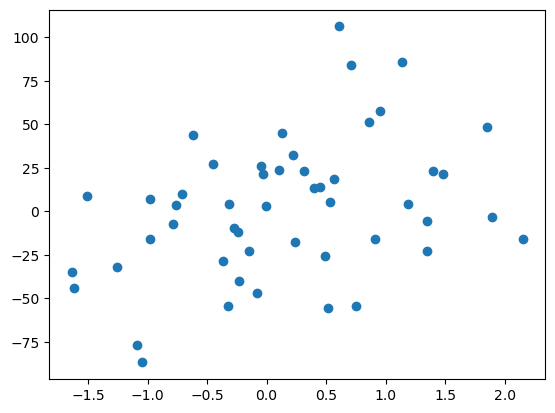

In [11]:
plt.scatter(x,y)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
ln=LinearRegression()
ln.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
ln.coef_

array([15.75900724])

In [7]:
ln.intercept_

np.float64(-0.5410583978757844)

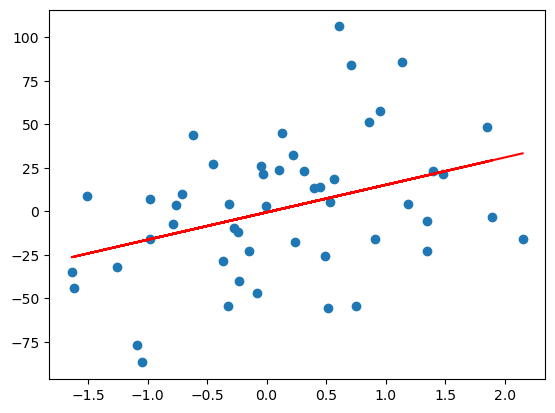

In [8]:
plt.scatter(x,y)
plt.plot(x,ln.predict(x),color='r')

In [9]:
# y_pred=((71.8082*x)+0).reshape(4)

ValueError: cannot reshape array of size 50 into shape (4,)

In [ ]:
y_pred

In [ ]:
plt.scatter(x,y)
plt.plot(x,ln.predict(x),color='r')
plt.plot(x,y_pred,color='b')

In [ ]:
m=71.8082
b=0
loss_slope=-2*np.sum(y-m*x.ravel()-b)
loss_slope

In [ ]:
lr=.1
step_size=loss_slope*lr
step_size

In [ ]:
b=b-step_size
b

In [ ]:
y_pred1=((71.8082*x)+b).reshape(4)

In [ ]:
plt.scatter(x,y)
plt.plot(x,ln.predict(x),color='r')
plt.plot(x,y_pred,color='b')
plt.plot(x,y_pred1,color='k')

In [ ]:

m=71.8082
b=100

plt.plot(x,y_pred,color='k',label='b={}'.format(b))
for i in range(5):
    loss_slope=-2*np.sum(y-m*x.ravel()-b)
    step_size=loss_slope*lr
    b=b-step_size
    y_pred1=((71.8082*x)+b).reshape(4)
    
    plt.scatter(x,y)
    plt.plot(x,ln.predict(x),color='r')
    plt.plot(x,y_pred1,label='b={}'.format(b))
    plt.legend()


In [21]:
import pandas as pd 
df=pd.read_csv(r'/home/shino/Documents/Datasets/covid_toy.csv')


In [31]:
df['has_covid']=df['has_covid'].map({'Yes':1,'No':0})

In [32]:
x=df.iloc[:,0:1]
y=df['has_covid']

In [33]:
x,y


(    age
 0    60
 1    27
 2    42
 3    31
 4    65
 ..  ...
 95   12
 96   51
 97   20
 98    5
 99   10
 
 [100 rows x 1 columns],
 0     0
 1     1
 2     0
 3     0
 4     0
      ..
 95    0
 96    1
 97    0
 98    0
 99    1
 Name: has_covid, Length: 100, dtype: int64)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [38]:
from sklearn.linear_model import SGDRegressor

In [39]:
sgd=SGDRegressor(loss='squared_error',max_iter=100,shuffle=True,random_state=32)

In [40]:
sgd.fit(x_train,y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,32


In [42]:
y_pred=sgd.predict(x_test)